# Sparse Matrix Hermitian

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `SparseMatrixHermitian`
Hermitian Block encoding of a sparse-access Hermitian matrix.

Given column and entry oracles $O_c$ and $O_A$ for an $s$-sparse Hermitian matrix
$A \in \mathbb{C}^{2^n \times 2^n}$, i.e. one where each row / column has exactly $s$ non-zero
entries, computes a $(s, n+1, \epsilon)$-block encoding of $A$ as follows:
```
           ┌────┐
a     |0> ─┤    ├─     |0> ───────────────────────X────────────────────
           │    │           ┌──┐                  |               ┌──┐
           │ U  │  =        │ n│ ┌────┐ ┌────┐    | ┌────┐ ┌────┐ │ n│
l   |0^n> ─┤  A ├─   |0^n> ─┤H ├─┤ O  ├─┤    ├─X──|─┤    ├─┤ O* ├─┤H ├─
           │    │           └──┘ |  c | │    │ |  | │    │ |  c | └──┘
           │    │                └────┘ │ O  │ │  | │ O* │ └────┘
b     |0> ─┤    ├─     |0> ────────|────┤  A ├─|──X─┤  A ├───|─────────
           |    |                ┌────┐ |    | |    |    | ┌────┐
           |    |                | O  | |    | |    |    | | O* |
j   |Psi> ─┤    ├─   |Psi> ──────┤  c ├─┤    ├─X────┤    ├─┤  c ├──────
           └────┘                └────┘ └────┘      └────┘ └────┘
```

To encode a matrix of irregular dimension, the matrix should first be embedded into one of
dimension $2^n \times 2^n$ for suitable $n$.
To encode a matrix where each row / column has at most $s$ non-zero entries, some zeroes should
be treated as if they were non-zero so that each row / column has exactly $s$ non-zero entries.

For encoding a non-hermitian matrix, or a slightly more efficient (but non Hermitian-encoding)
of a matrix, use :class:`SparseMatrix` instead.

#### Parameters
 - `col_oracle`: The column oracle $O_c$. See `RowColumnOracle` for definition.
 - `entry_oracle`: The entry oracle $O_A$. See `EntryOracle` for definition.
 - `eps`: The precision of the block encoding.
 - `is_controlled`: if True, returns the controlled block-encoding. 

#### Registers
 - `ctrl`: The single qubit control register. (present only if `is_controlled` is `True`)
 - `system`: The system register.
 - `ancilla`: The ancilla register.
 - `resource`: The resource register (present only if `bitsize > 0`). 

#### References
 - [Lecture Notes on Quantum Algorithms for Scientific Computation](https://arxiv.org/abs/2201.08309). Lin Lin (2022). Ch. 6.5. Proposition 6.8, Fig 6.7.


In [2]:
from qualtran.bloqs.block_encoding import SparseMatrixHermitian

### Example Instances

In [3]:
from qualtran.bloqs.block_encoding.sparse_matrix import TopLeftRowColumnOracle
from qualtran.bloqs.block_encoding.sparse_matrix_hermitian import UniformSqrtEntryOracle

n = sympy.Symbol('n', positive=True, integer=True)
col_oracle = TopLeftRowColumnOracle(system_bitsize=n)
entry_oracle = UniformSqrtEntryOracle(system_bitsize=n, entry=0.3)
sparse_matrix_symb_hermitian_block_encoding = SparseMatrixHermitian(
    col_oracle, entry_oracle, eps=0
)

In [4]:
from qualtran.bloqs.block_encoding.sparse_matrix import TopLeftRowColumnOracle
from qualtran.bloqs.block_encoding.sparse_matrix_hermitian import UniformSqrtEntryOracle

col_oracle = TopLeftRowColumnOracle(system_bitsize=2)
entry_oracle = UniformSqrtEntryOracle(system_bitsize=2, entry=0.3)
sparse_matrix_hermitian_block_encoding = SparseMatrixHermitian(col_oracle, entry_oracle, eps=0)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([sparse_matrix_symb_hermitian_block_encoding, sparse_matrix_hermitian_block_encoding],
           ['`sparse_matrix_symb_hermitian_block_encoding`', '`sparse_matrix_hermitian_block_encoding`'])

### Call Graph

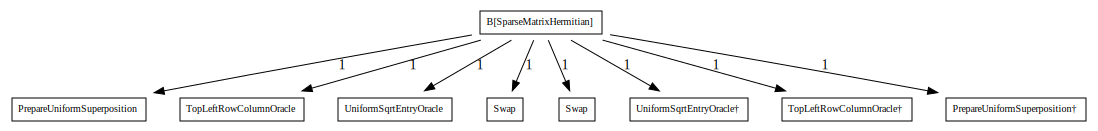

#### Counts totals:
 - `PrepareUniformSuperposition`: 1
 - `PrepareUniformSuperposition†`: 1
 - `Swap`: 1
 - `Swap`: 1
 - `TopLeftRowColumnOracle`: 1
 - `TopLeftRowColumnOracle†`: 1
 - `UniformSqrtEntryOracle`: 1
 - `UniformSqrtEntryOracle†`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
sparse_matrix_symb_hermitian_block_encoding_g, sparse_matrix_symb_hermitian_block_encoding_sigma = sparse_matrix_symb_hermitian_block_encoding.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(sparse_matrix_symb_hermitian_block_encoding_g)
show_counts_sigma(sparse_matrix_symb_hermitian_block_encoding_sigma)